## Portfolio Optimization - Module 1 Graded Quiz 
##### salimt

In [1]:
import pandas as pd
import numpy as np
import os
import sys
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install matplotlib

In [2]:
path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
data = pd.read_csv(path+"\data\edhec-hedgefundindices.csv",header = 0, index_col=0, parse_dates=True, 
na_values=-99.99)
data.index = pd.to_datetime(data.index, format="%Y%m")
data.index = data.index.to_period('M')
data.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


**Monthly Parametric Gaussian VaR at the 1% level**

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit_111 as erk
data00 = data["2000":]

gauss_unmodified = erk.var_gaussian(data00, 1).sort_values(ascending=False)/100
gauss_unmodified

Short Selling             0.102130
Emerging Markets          0.058070
CTA Global                0.050336
Long/Short Equity         0.039420
Convertible Arbitrage     0.034845
Distressed Securities     0.031430
Event Driven              0.030853
Funds Of Funds            0.029385
Global Macro              0.024619
Relative Value            0.021605
Fixed Income Arbitrage    0.019519
Merger Arbitrage          0.015355
Equity Market Neutral     0.014772
dtype: float64

In [4]:
round(gauss_unmodified['Distressed Securities']*100, 2)

3.14

**Monthly Parametric Gaussian VaR at the 1% level after applying the Cornish-Fisher Adjustment**

In [5]:
gauss_modified = erk.var_gaussian(data00, 1, modified=True).sort_values(ascending=False)/100
gauss_modified

Convertible Arbitrage     0.103666
Short Selling             0.098323
Emerging Markets          0.086796
Fixed Income Arbitrage    0.066479
Long/Short Equity         0.051381
Distressed Securities     0.049669
Relative Value            0.048985
Funds Of Funds            0.048793
CTA Global                0.046643
Event Driven              0.045732
Equity Market Neutral     0.041432
Global Macro              0.022786
Merger Arbitrage          0.021282
dtype: float64

In [6]:
round(gauss_modified['Distressed Securities']*100, 2)

4.97

**Monthly Historic VaR at the 1% level**

In [7]:
import edhec_risk_kit_111 as erk
historicVar = erk.var_historic(data00, 1).sort_values(ascending=False)/100
historicVar

Short Selling             0.107684
Emerging Markets          0.065496
CTA Global                0.050938
Long/Short Equity         0.045060
Distressed Securities     0.042642
Event Driven              0.038540
Convertible Arbitrage     0.031674
Fixed Income Arbitrage    0.030748
Funds Of Funds            0.027200
Merger Arbitrage          0.022654
Global Macro              0.022632
Relative Value            0.021788
Equity Market Neutral     0.019800
dtype: float64

In [8]:
round(historicVar['Distressed Securities']*100, 2)

4.26

**During the 5 year period 2013-2017 (both inclusive) to estimate the expected returns as well as the covariance matrix**

In [9]:
ind = pd.read_csv(path+"/data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.columns = ind.columns.str.strip()
ind1317 = ind["2013":"2017"]
er = erk.annualize_rets(ind1317, 12)
cov = ind1317.cov()

In [10]:
l = ["Books", "Steel", "Oil", "Mines"]
cov.loc[l,l]

,Books,Steel,Oil,Mines
Books,0.002720,0.001940,0.001637,0.001539
Steel,0.001940,0.004391,0.002122,0.003391
Oil,0.001637,0.002122,0.002697,0.002179
Mines,0.001539,0.003391,0.002179,0.005232


**Weight in the MSR portfolio**

In [11]:
w_msr = erk.msr(0.1, np.array(er[l]), cov.loc[l,l])
w_msr

array([4.63865057e-15, 1.00000000e+00, 1.86482774e-16, 0.00000000e+00])

**Weight in the GMV portfolio**

In [12]:
w_gmv = erk.gmv(cov.loc[l,l])
w_gmv

array([0.47702486, 0.        , 0.43411204, 0.0888631 ])

**Annualized volatility over 2018 using the weights of the MSR portfolio**

In [13]:
erk.portfolio_vol(w_msr, ind["2018"][l].cov())*(12**(1/2))

0.21983988181484146

**Annualized volatility over 2018 using the weights of the GMV portfolio**

In [14]:
erk.portfolio_vol(w_gmv, ind["2018"][l].cov())*(12**(1/2))

0.18973734621505792

<AxesSubplot:xlabel='Volatility'>

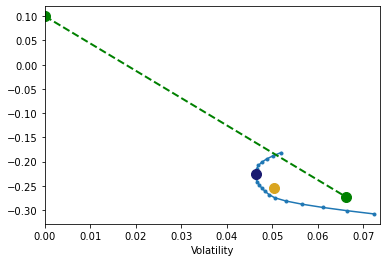

In [15]:
erk.plot_ef(20, erk.annualize_rets(ind["2018"], 12)[l], cov.loc[l,l], show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)